In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel('범죄와의전쟁.xlsx',index_col=0)
df2 = pd.read_excel('광해.xlsx',index_col=0)
df3 = pd.read_excel('내부자들.xlsx',index_col=0)
df4 = pd.read_excel('더킹.xlsx',index_col=0)

In [3]:
df1.head()

,review,score,sentiment
0,영화 어제 봤습니다. 80~90년대 부산에 산 사람만이 알 수 있는 표현들이 너무 ...,10,1
1,ㅂㅈㅇㅇㅈㅈ 아~ 부산냄새~ 나는 서울 출신 이라서 무슨말하는지 이해안감,0,0
2,조폭영화중 최고 최민식이 다 살렸다,6,1
3,NaN,7,1
4,프리비에트 돌았네~~,9,1


In [4]:
# nan값 있는 항 모두제거
df1 = df1.dropna(axis=0)
df2 = df2.dropna(axis=0)
df3 = df3.dropna(axis=0)
df4 = df4.dropna(axis=0)

In [5]:
df1.shape

(1829, 3)

In [6]:
df2.shape

(3427, 3)

In [7]:
df3.shape

(985, 3)

In [8]:
df4.shape

(2547, 3)

### TDM 만들기(명사만 추출)

In [9]:
import stanza

In [10]:
nlp = stanza.Pipeline('ko')

2020-05-14 01:05:35 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | kaist   |
| pos       | kaist   |
| lemma     | kaist   |
| depparse  | kaist   |

2020-05-14 01:05:35 INFO: Use device: gpu
2020-05-14 01:05:35 INFO: Loading: tokenize
2020-05-14 01:05:38 INFO: Loading: pos
2020-05-14 01:05:39 INFO: Loading: lemma
2020-05-14 01:05:39 INFO: Loading: depparse
2020-05-14 01:05:40 INFO: Done loading processors!


In [11]:
def extract_nouns(text):
    doc = nlp(text)
    for sentence in doc.sentences:
        for word in sentence.words:
            lemma = word.lemma.split('+')
            xpos = word.xpos.split('+')
            for w,p in zip(lemma,xpos):
                if p.startswith('n'):
                    yield w

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

- 범죄와의전쟁 단어문서행렬 작성

In [13]:
cv1 = CountVectorizer(max_features=2000, tokenizer=extract_nouns)

In [14]:
tdm1 = cv1.fit_transform(df1['review'])

In [15]:
tdm1.shape

(1829, 2000)

In [16]:
word_count1 = pd.DataFrame({
    '단어': cv1.get_feature_names(),
    '빈도': tdm1.sum(axis=0).flat
})

In [17]:
word_count1.sort_values('빈도',ascending=False).head()

,단어,빈도
881,영화,603
787,연기,530
1636,최민식,347
1911,하정우,327
444,배우,294


In [18]:
word_count1.to_excel('범죄와의전쟁-count.xlsx')

- 광해 단어문서행렬 작성

In [19]:
cv2 = CountVectorizer(max_features=2000, tokenizer=extract_nouns)

In [20]:
tdm2 = cv2.fit_transform(df2['review'])

In [21]:
tdm2.shape

(3427, 2000)

In [22]:
word_count2 = pd.DataFrame({
    '단어': cv2.get_feature_names(),
    '빈도': tdm2.sum(axis=0).flat
})

In [23]:
word_count2.sort_values('빈도',ascending=False).head()

,단어,빈도
1119,영화,1352
1363,이병헌,762
1062,연기,747
97,감동,422
1738,최고,272


In [24]:
word_count2.to_excel('광해-count.xlsx')

- 내부자들 단어문서행렬 작성

In [25]:
cv3 = CountVectorizer(max_features=2000, tokenizer=extract_nouns) 

In [26]:
tdm3 = cv3.fit_transform(df3['review'])

In [27]:
tdm3.shape

(985, 2000)

In [28]:
word_count3 = pd.DataFrame({
    '단어': cv3.get_feature_names(),
    '빈도': tdm3.sum(axis=0).flat
})

In [29]:
word_count3.sort_values('빈도',ascending=False).head()

,단어,빈도
773,영화,325
1894,현실,160
723,연기,147
642,시간,124
998,이,107


In [30]:
word_count3.to_excel('내부자들-count.xlsx')

- 더킹 단어문서행렬 작성

In [31]:
cv4 = CountVectorizer(max_features=2000, tokenizer=extract_nouns) 

In [32]:
tdm4 = cv4.fit_transform(df4['review'])

In [33]:
tdm4.shape

(2547, 2000)

In [34]:
word_count4 = pd.DataFrame({
    '단어': cv4.get_feature_names(),
    '빈도': tdm4.sum(axis=0).flat
})

In [35]:
word_count4.sort_values('빈도',ascending=False).head()

,단어,빈도
993,영화,828
920,연기,358
1431,정우성,269
1459,조인성,259
525,배우,224


In [36]:
word_count4.to_excel('더킹-count.xlsx')

### 단어구름으로 대충 뭐가 있는지 확인.

In [37]:
from wordcloud import WordCloud

In [38]:
wc = WordCloud(font_path='C:/Windows/Fonts/NanumGothic.ttf', background_color='white', width=400, height=300)

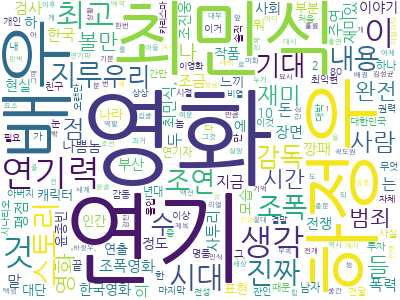

In [39]:
word_count1 = pd.read_excel('범죄와의전쟁-count.xlsx')
count_dic1 = word_count1.set_index('단어')['빈도'].to_dict()  
cloud1 = wc.generate_from_frequencies(count_dic1)
cloud1.to_image()

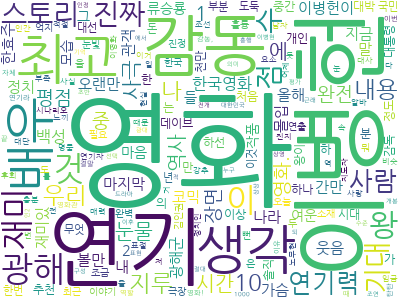

In [41]:
word_count2 = pd.read_excel('광해-count.xlsx')
count_dic2 = word_count2.set_index('단어')['빈도'].to_dict()
cloud2 = wc.generate_from_frequencies(count_dic2)
cloud2.to_image()

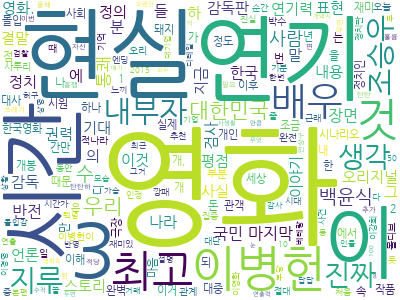

In [42]:
word_count3 = pd.read_excel('내부자들-count.xlsx')
count_dic3 = word_count3.set_index('단어')['빈도'].to_dict()
cloud3 = wc.generate_from_frequencies(count_dic3)
cloud3.to_image()

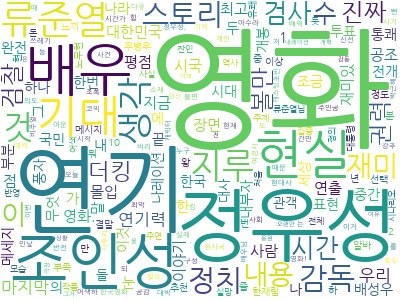

In [43]:
word_count4 = pd.read_excel('더킹-count.xlsx')
count_dic4 = word_count4.set_index('단어')['빈도'].to_dict()
cloud4 = wc.generate_from_frequencies(count_dic4)
cloud4.to_image()